## Let's try something cool today!

We're about to start a CNN Concrete Cracks identifier (whether concrete is cracked or not based on provided images)

let's delve in!

In [1]:
# let's import our tensorflow package
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# path to dataset

data_dir = "/kaggle/input/concretedataset/data"

# load dataset: training
image_pixels = 227
batch_size = 128
epochs = 5

datagen = ImageDataGenerator(validation_split=0.2)

train_ds = datagen.flow_from_directory(
    data_dir,
    target_size = (image_pixels, image_pixels),
    class_mode = "binary",  
    shuffle = True,
    subset = "training",
    batch_size=batch_size
)

Found 32000 images belonging to 2 classes.


In [16]:
# and the validation dataset
validation_ds = datagen.flow_from_directory(
    data_dir,
    target_size = (image_pixels, image_pixels),
    class_mode = "binary",  
    shuffle = True,
    subset = "validation",
    batch_size=batch_size
)

Found 8000 images belonging to 2 classes.


Class names: ['Negative', 'Positive']


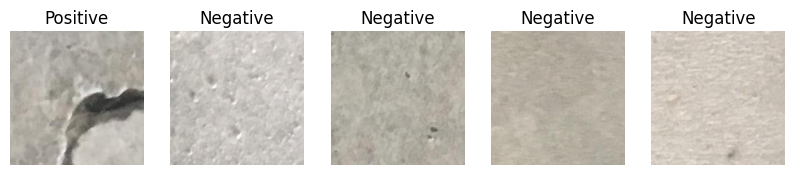

In [17]:
class_names = list(train_ds.class_indices.keys())
print(f"Class names: {class_names}")

# viewing the first 5 images from the training dataset
plt.figure(figsize=(10, 10))
images, labels = next(train_ds)
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()

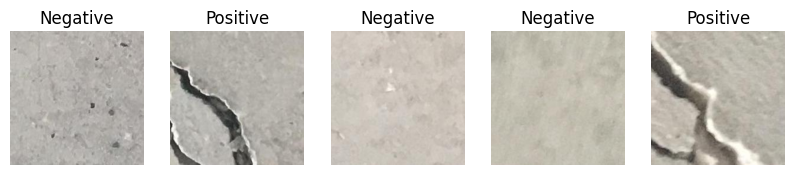

In [18]:
# let's do the same for the validation dataset
plt.figure(figsize=(10, 10))
images, labels = next(validation_ds)
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()
        

In [19]:
# building the model
model = models.Sequential([
    layers.Input(shape=(image_pixels, image_pixels, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    12,390,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,409,921 (47.34 MB)

 Trainable params: 12,409,921 (47.34 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")
history = model.fit(train_ds, validation_data=validation_ds, epochs=epochs, callbacks=[checkpoint])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1392s 6s/step - accuracy: 0.7382 - loss: 125.5163 - val_accuracy: 0.9740 - val_loss: 0.3407
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1375s 5s/step - accuracy: 0.9627 - loss: 0.3354 - val_accuracy: 0.9730 - val_loss: 0.0721
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1370s 5s/step - accuracy: 0.9745 - loss: 0.0715 - val_accuracy: 0.9821 - val_loss: 0.0366
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1432s 6s/step - accuracy: 0.9791 - loss: 0.0497 - val_accuracy: 0.9879 - val_loss: 0.0292
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1388s 6s/step - accuracy: 0.9853 - loss: 0.0372 - val_accuracy: 0.9871 - val_loss: 0.0312


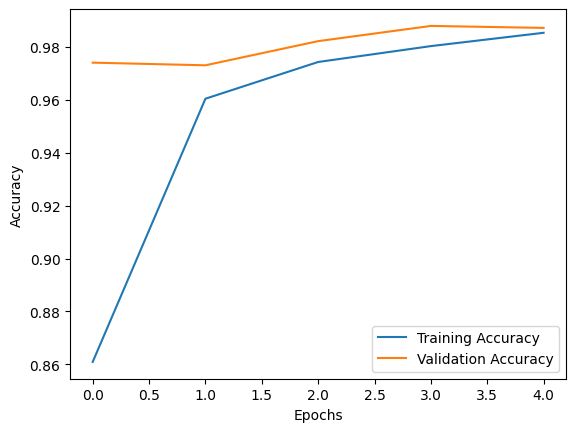

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

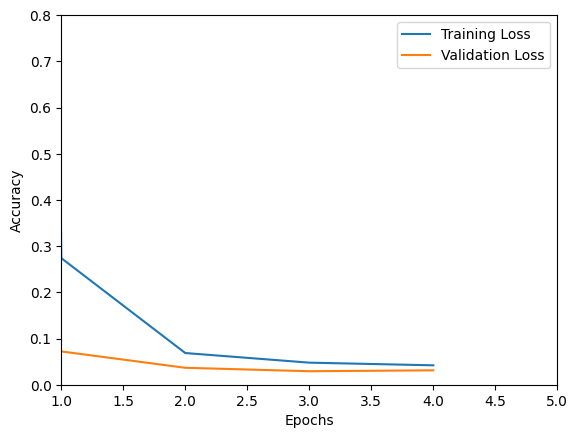

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlim([1, 5])
plt.ylim([0, 0.8])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This should imply that the model, since the training loss is low (not underfitting) and the testing loss isn't high (goes in accordance with the training loss, so no overfitting), is a good model (despite the low number of epochs which is 5 in this notebook, but if we had more epochs we would be in risk of overfitting the model if the testing loss starts increasing after some point OR we would have a lot more time, for this exercise I had to train this model on 5 epochs for more than 4 hours!)

- The validation and training accuracies are both very good
- The validation and training losses also converge neatly by the end of the training
--> We can dump this model to be used for later!

In [33]:
# saving the model for future use:
model.save("/kaggle/working/saved_model.keras")

In the future, I can improve this model by trying some of the following (or all of them):
- using at least another Dense layer with 128 kernels, (3, 3) kernel_size and of course a ReLu activation function
- Using Dropout in one of my layers
- using Early Stopping in case I opted for increased epochs (of course that's another thing to go for another time)
- tweaking some parameters like the batch size, maybe rescaling the images would make the model training faster but lose on some accuracy/ increase loss, etc...